In [1]:
import numpy as np
from numpy import pi, exp, sqrt, abs, real, imag
import scipy
import os
import pathlib
import pandas as pd

In [2]:
def E_k(spec, kx, ky):
    k2 = kx**2 + ky**2
    spec2 = spec
    E_dict = {}
    for i in range(k2.shape[0]):
        for j in range(k2.shape[1]):
            k = k2[i, j]
            E = spec2[i, j]
            if k in E_dict:
                E_dict[k] += E
            else:
                E_dict[k] = E
    k_list = []
    E_list = []
    for k in sorted(E_dict.keys()):
        k_list.append(k)
        E_list.append(E_dict[k])
    return np.sqrt(np.array(k_list)), np.array(E_list)

In [3]:
root = pathlib.Path(os.getcwd()).parent
exp_data_path = root.joinpath('Fig3\Exp_t=pi_over_2.xlsx')
ideal_data_path = root.joinpath('Fig3\Ideal_t=pi_over_2.xlsx')
exp_data = pd.read_excel(exp_data_path, sheet_name=None, index_col=0)
ideal_data = pd.read_excel(ideal_data_path, sheet_name=None, index_col=0)


N = 2**5
kx = np.fft.fftfreq(N)*N
ky = np.fft.fftfreq(N)*N
kx, ky = np.fft.fftshift(kx), np.fft.fftshift(ky) 
KX, KY = np.meshgrid(kx, ky) 

# exp
density = np.array(exp_data["density"])
momentum_x = np.array(exp_data["momentum_x"])
momentum_y = np.array(exp_data["momentum_y"])
ux = momentum_x / density
uy = momentum_y / density
ux_spec = np.fft.fftshift(np.fft.fft2(ux)) / N**2
uy_spec = np.fft.fftshift(np.fft.fft2(uy)) / N**2
energy_spec = (abs(ux_spec)**2 + abs(uy_spec)**2) / 2
k_exp, Ek_exp = E_k(energy_spec, KX, KY)

# ideal
density = np.array(ideal_data["density"])
momentum_x = np.array(ideal_data["momentum_x"])
momentum_y = np.array(ideal_data["momentum_y"])
ux = momentum_x / density
uy = momentum_y / density
ux_spec = np.fft.fftshift(np.fft.fft2(ux)) / N**2
uy_spec = np.fft.fftshift(np.fft.fft2(uy)) / N**2
energy_spec = (abs(ux_spec)**2 + abs(uy_spec)**2) / 2
k_ideal, Ek_ideal = E_k(energy_spec, KX, KY)

C:\Users\xsb\AppData\Local\Temp/ipykernel_9672/323221000.py:26: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, N)


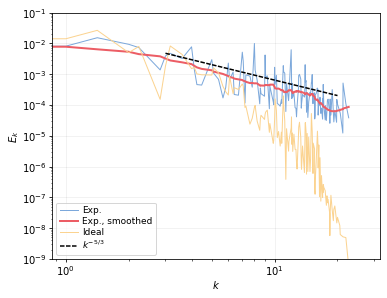

In [4]:
import matplotlib.pyplot as plt
fontsize = 10

fig = plt.figure()

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 1)

ax = plt.subplot(gs[0, 0])
ax.set_box_aspect(3/4)

# Exp.
ax.loglog(k_exp, Ek_exp, linewidth=1, color='#7ca8db', label='Exp.')
Ek_smooth = scipy.signal.savgol_filter(np.log(Ek_exp), 53, 3)
Ek_smooth = np.exp(Ek_smooth)
ax.loglog(k_exp, Ek_smooth, linewidth=2, color='#ec5d65', label='Exp., smoothed')

# Ideal
ax.loglog(k_ideal, Ek_ideal, alpha=1, linewidth=1, color='#fbd390', label='Ideal')

ax.loglog(np.linspace(3, 20, 50), 0.03*np.linspace(3, 20, 50)**(-5/3), linestyle='--', dashes=(3, 1), color='k', alpha=1, label=r'$k^{-5/3}$')
ax.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.1)

ax.legend(ncol=1, frameon=True, labelspacing=0.2, handlelength=2, handletextpad=0.5, loc='best', fontsize=fontsize-1)

plt.xlim(0, N)
plt.ylim(1e-9, 1e-1)
plt.xlabel(r'$k$', labelpad=1, size=fontsize)
plt.ylabel(r'$E_k$', labelpad=1, size=fontsize)
ax.tick_params(which='major', direction='out', top=False, right=False, length=3, pad=2)
ax.tick_params(which='minor', direction='out', top=False, right=False, length=1.5, pad=2)
plt.tight_layout(pad=0.2, w_pad=1, h_pad=1)

plt.savefig('SuppFigS10.pdf', facecolor='None', edgecolor='None', orientation='portrait', format='pdf', bbox_inches='tight')